In [1]:
%matplotlib inline
import os
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_html_bs(url):
    r = requests.get(url)
    return BeautifulSoup(r.text, 'html.parser')

In [3]:
def get_user_name(td):
    return td.find('a').find('span').text


def get_country(td):
    basename = os.path.basename(td.find('img')['src'])
    fname, _ = os.path.splitext(basename)
    return fname


def parse_td_list(td_list):
    rank = int(td_list[0].text)
    rating = int(td_list[2].text)
    max_rating = int(td_list[3].text)
    count = int(td_list[4].text)
    win_count = int(td_list[5].text)
    user_name = get_user_name(td_list[1])
    country = get_country(td_list[1])

    return {'rank': rank, 'rating': rating, 'max_rating': max_rating, 'count': count, 'win_count': win_count, 'user_name': user_name, 'country': country}

def parse_ranking(bs):
    users = []
    rank_table = bs.find('table')
    for tr in rank_table.find_all('tr')[1::]:
        td_list = tr.find_all('td')
        user = parse_td_list(td_list)
        users.append(user)
    
    return users

In [4]:
base_url = 'https://atcoder.jp/ranking?p={}'
users = []
for i in tqdm(range(1, 52)):
    url = base_url.format(i)
    bs = get_html_bs(url)
    users += parse_ranking(bs)

100%|██████████| 51/51 [00:15<00:00,  3.86it/s]


In [5]:
def plot_hist(ax, x, bins, color):
    return ax.hist(x, bins=bins, color=color)


def plot_rating_hist(ax, lower_count):
    rating = [user['rating']
              for user in users if user['count'] if user['count'] >= lower_count]
    color_thresholds = [9999, 2800, 2400, 2000, 1600, 1200, 800, 400, 0]
    colors = ['red', '#FF8000', '#C0C000', 'blue',
              'cyan', '#008000', '#804000', '#808080']
    bins = range(min(rating) // 100 * 100, max(rating) // 100 * 100, 100)
    mean = np.mean(rating)
    print('mean = {:.2f}, median = {:.2f}, std = {:.2f}'.format(
        mean, np.median(rating), np.std(rating)))

    ymax = 0
    for i in range(len(color_thresholds) - 1):
        upper = color_thresholds[i]
        lower = color_thresholds[i + 1]
        x = [x for x in rating if x in range(lower, upper)]
        ret = plot_hist(ax, x, bins, colors[i])
        ymax = max(ymax, max(ret[0]))

    ax.vlines([mean], 0, ymax)
    ax.title('lower count = {}'.format(lower_count))

mean = 757.51, median = 565.00, std = 712.12


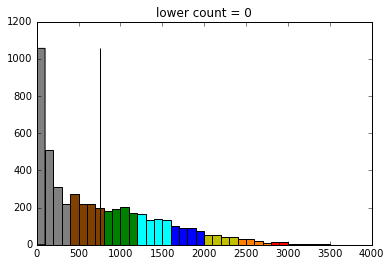

In [6]:
plot_rating_hist(plt, 0)

mean = 1413.69, median = 1345.00, std = 659.43


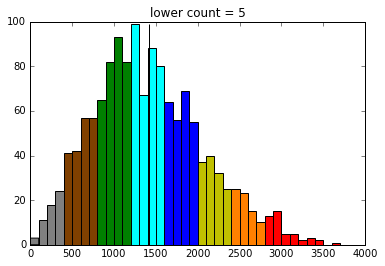

In [7]:
plot_rating_hist(plt, 5)

mean = 1625.06, median = 1569.50, std = 603.58


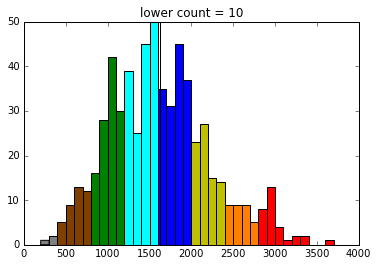

In [8]:
plot_rating_hist(plt, 10)

mean = 1726.32, median = 1705.50, std = 515.16


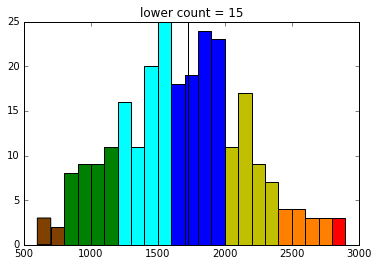

In [9]:
plot_rating_hist(plt, 15)